In [10]:
import wrangle as w

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = w.get_data()

In [4]:
train, val, test = w.train_validate_test(df, 'outcome')

In [6]:
train.shape, val.shape, test.shape

((429, 9), (185, 9), (154, 9))

# Explore

### Distributions


In [20]:
train.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

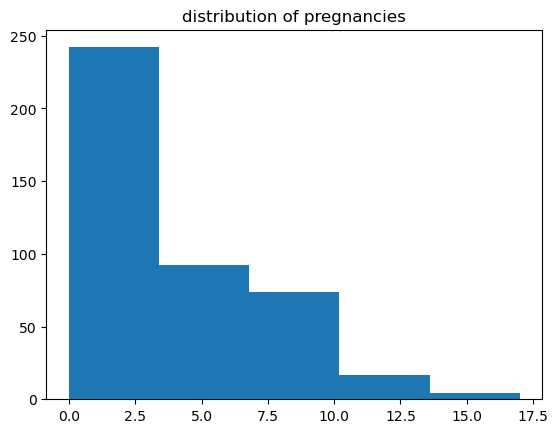

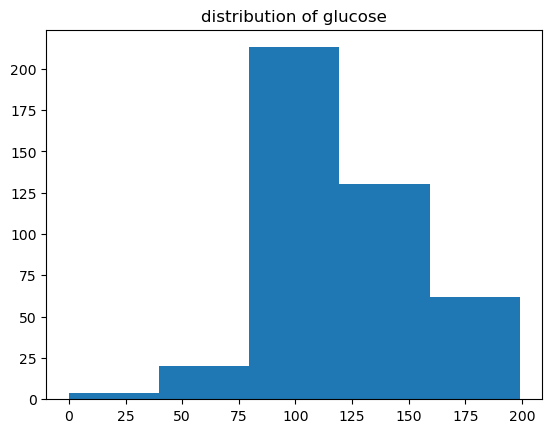

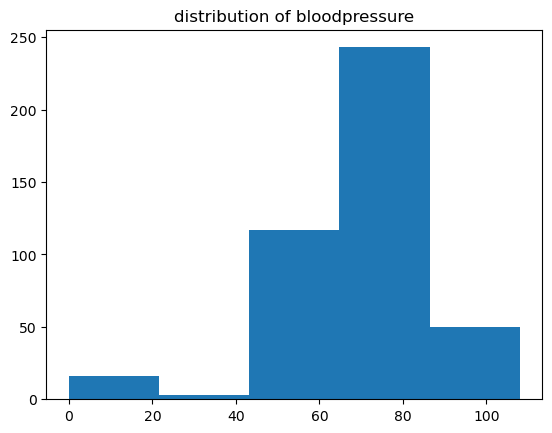

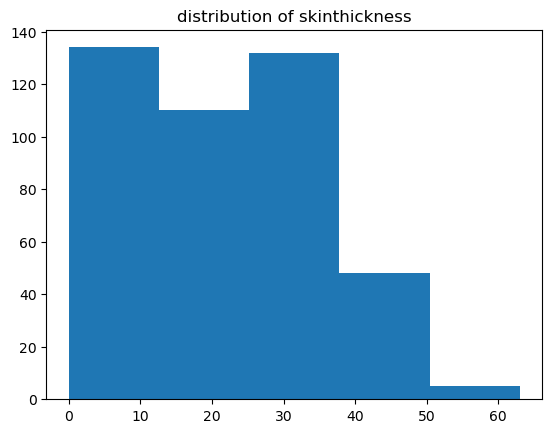

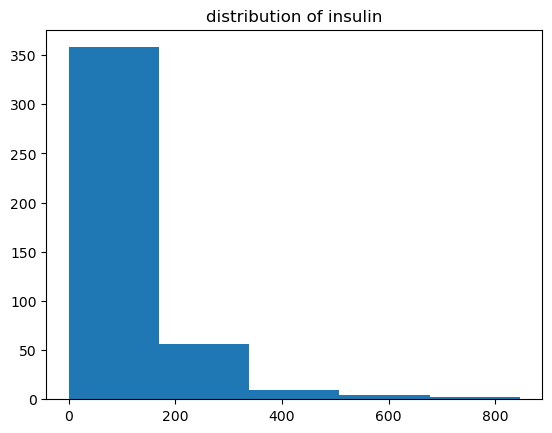

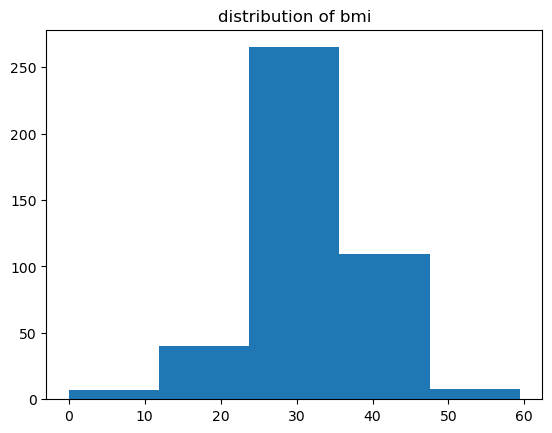

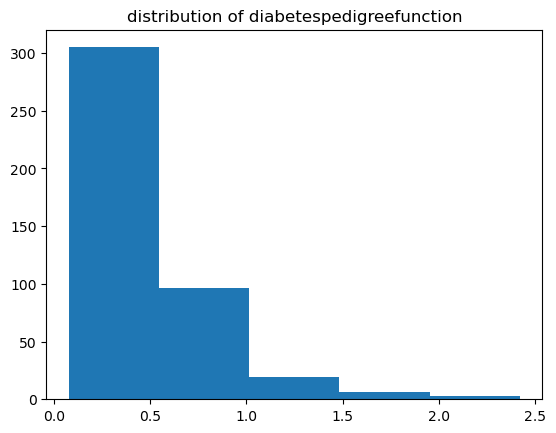

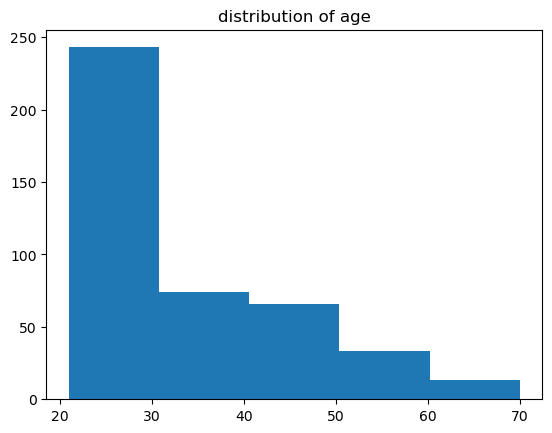

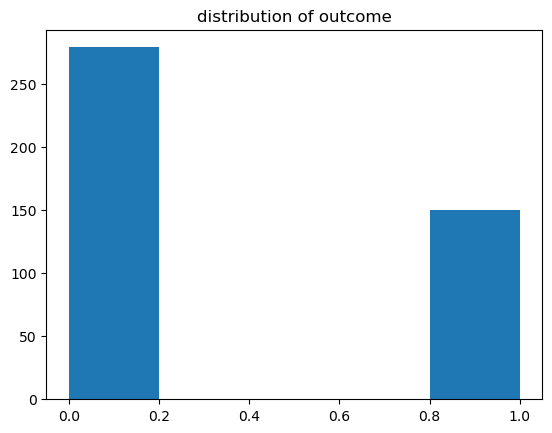

In [37]:
for col in df.columns:
    train[col].hist(bins=5, grid=False)
    plt.title(f'distribution of {col}')
    plt.show()